Customer Segmentation

In [ ]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
import warnings
warnings.filterwarnings('ignore')


In [ ]:
#Importing the dataset
df = pd.read_csv('/content/Mall_Customers Seg.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.shape

(200, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df = df.rename(columns={'Genre': 'Gender'})
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


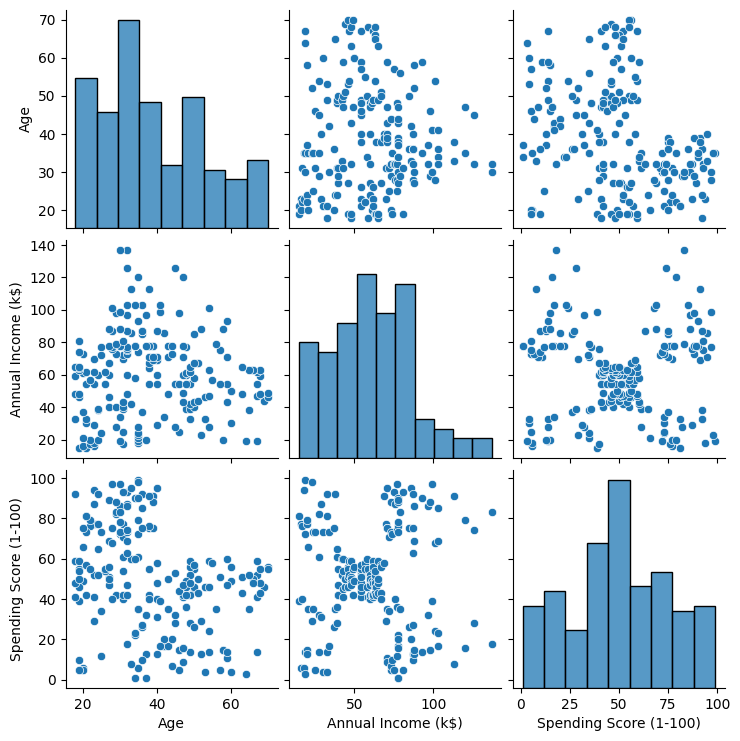

In [ ]:
import matplotlib.pyplot as plt
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.show()


Co-variance Matrix

In [ ]:
import plotly.express as px

# Select only numerical features
numerical_features = df.select_dtypes(include=np.number)

# Calculate the covariance matrix
covariance_matrix = numerical_features.cov()

# Plot the covariance matrix using Plotly Express
fig = px.imshow(covariance_matrix,
                labels=dict(x="Features", y="Features", color="Covariance"),
                x=covariance_matrix.columns,
                y=covariance_matrix.columns,
                color_continuous_scale='RdBu')
fig.update_layout(title='Covariance Matrix of Numerical Features')
fig.show()


Variance Scores:
Age                       195.133166
Annual Income (k$)        689.835578
Spending Score (1-100)    666.854271
dtype: float64


Visualizing the Gender Distribution

In [ ]:
# Calculate the gender distribution
gender_counts = df['Gender'].value_counts()

# Create a pie chart using Plotly Express
fig = px.pie(gender_counts, values=gender_counts.values, names=gender_counts.index, title='Gender Distribution')
fig.show()


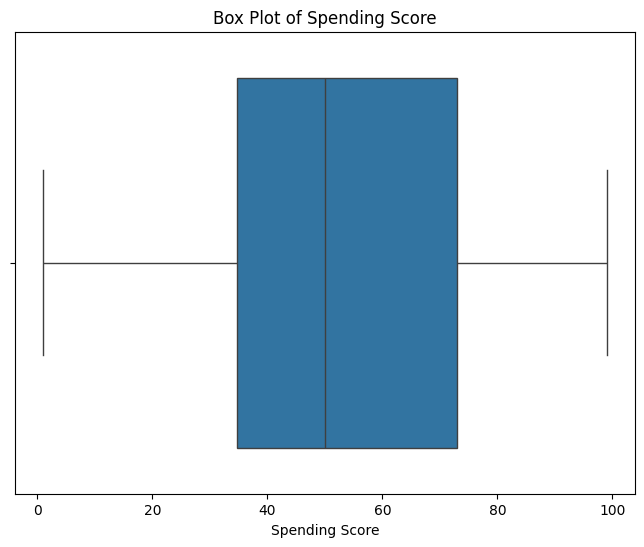

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Spending Score (1-100)'])
plt.title('Box Plot of Spending Score')
plt.xlabel('Spending Score')
plt.show()


Text(0, 0.5, 'Count')

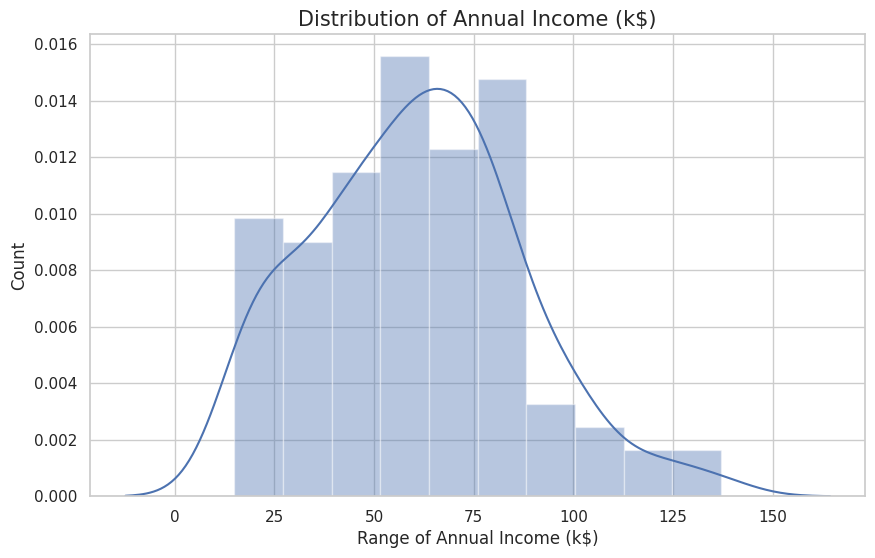

In [ ]:
#Distribution of Annnual Income
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(df['Annual Income (k$)'])
plt.title('Distribution of Annual Income (k$)', fontsize = 15)
plt.xlabel('Range of Annual Income (k$)')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

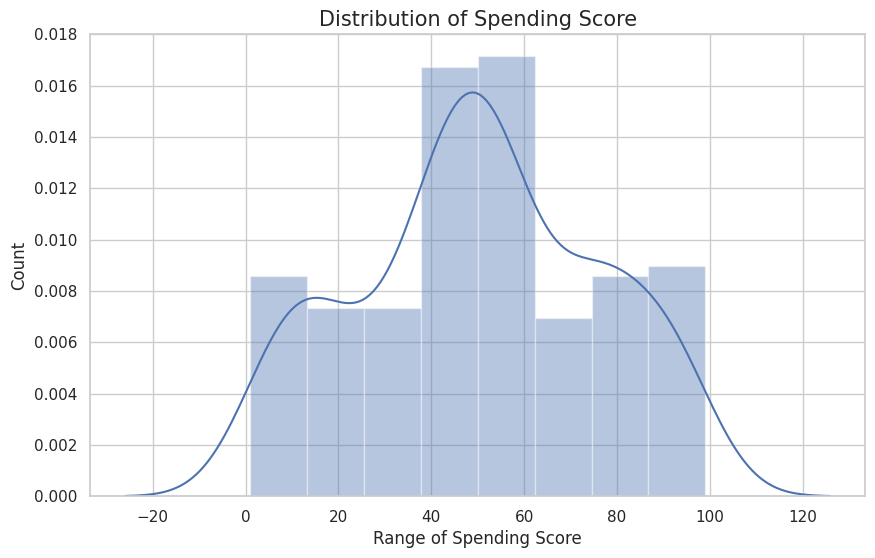

In [ ]:
#Distribution of Spending Score
plt.figure(figsize=(10, 6))
sns.set(style = 'whitegrid')
sns.distplot(df['Spending Score (1-100)'])
plt.title('Distribution of Spending Score', fontsize = 15)
plt.xlabel('Range of Spending Score')
plt.ylabel('Count')


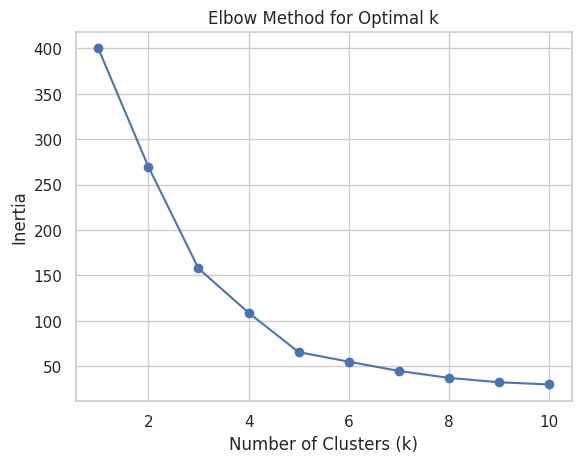

In [ ]:
# Select the features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Find the optimal number of clusters using the Elbow method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow method graph
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


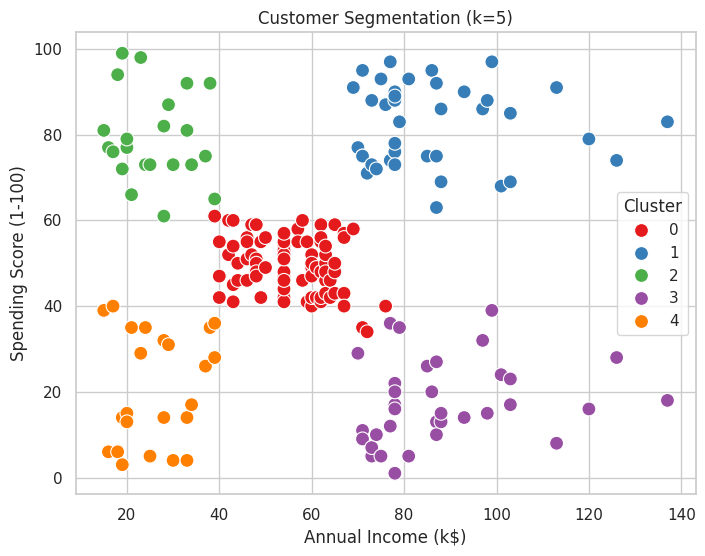

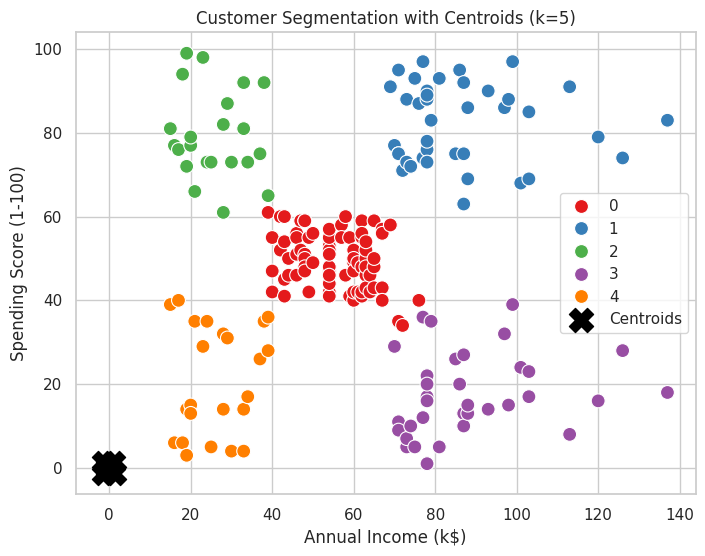

In [ ]:
# Select the features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Apply KMeans with k=5
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualizing the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster',
                palette='Set1', data=df, s=100, marker='o')
plt.title('Customer Segmentation (k=5)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

# Centroids of the clusters
centroids = kmeans.cluster_centers_

# Plot the centroids
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster',
                palette='Set1', data=df, s=100, marker='o')

# Add centroids to the plot
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='black', marker='X', label='Centroids')

plt.title('Customer Segmentation with Centroids (k=5)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


In [ ]:
cluster_summary = df.groupby('Cluster').agg(
    Avg_Income=('Annual Income (k$)', 'mean'),
    Avg_Spending_Score=('Spending Score (1-100)', 'mean'),
    Customer_Count=('CustomerID', 'count')
).reset_index()

# Display the summary table
print(cluster_summary)


   Cluster  Avg_Income  Avg_Spending_Score  Customer_Count
0        0   55.296296           49.518519              81
1        1   86.538462           82.128205              39
2        2   25.727273           79.363636              22
3        3   88.200000           17.114286              35
4        4   26.304348           20.913043              23


Silhouette Score for k=5: 0.5546571631111091


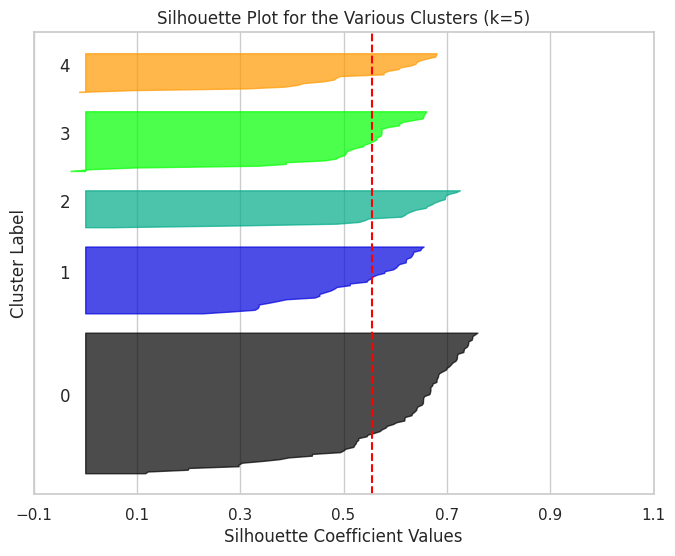

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from sklearn.metrics import silhouette_samples, silhouette_score

# Calculate silhouette scores for each sample
silhouette_vals = silhouette_samples(X_scaled, df['Cluster'])

# Silhouette score average
silhouette_avg = silhouette_score(X_scaled, df['Cluster'])
print(f"Silhouette Score for k=5: {silhouette_avg}")

# Number of clusters
n_clusters = 5
y_lower = 10  # Initialize the y-axis lower bound

# Create a figure to plot the silhouette graph
plt.figure(figsize=(8, 6))

for i in range(n_clusters):
    # Aggregate silhouette scores for each cluster
    ith_cluster_silhouette_vals = silhouette_vals[df['Cluster'] == i]
    ith_cluster_silhouette_vals.sort()

    size_cluster_i = ith_cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster_i

    # Fill the silhouette plot for this cluster
    color = cm.nipy_spectral(float(i) / n_clusters)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_vals,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for spacing between clusters

# Vertical line for average silhouette score of all values
plt.axvline(x=silhouette_avg, color="red", linestyle="--")

plt.title("Silhouette Plot for the Various Clusters (k=5)")
plt.xlabel("Silhouette Coefficient Values")
plt.ylabel("Cluster Label")

# Clear the y-axis labels
plt.yticks([])
plt.xticks(np.arange(-0.1, 1.1, 0.2))

plt.show()
